# FeedForward Neural Network

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df = pd.read_excel("loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [3]:
sex = pd.get_dummies(df['Sex'])
res_s = pd.get_dummies(df['Res_status'])
tele = pd.get_dummies(df['Telephone'])
occup= pd.get_dummies(df['Occupation'])
job_s = pd.get_dummies(df['Job_status'])
acc_r = pd.get_dummies(df['Acc_ref'])
lia_ref = pd.get_dummies(df['Liab_ref'])
dec = pd.get_dummies(df['Decision'])
df= pd.concat((df,sex,res_s,tele,occup,job_s,acc_r,lia_ref,dec),axis=1)

df.head(10)

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,...,retired,self_empl,student,unemploye,given,oth_inst_,f,t,accept,reject
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,...,0,0,0,1,1,0,1,0,0,1
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,...,0,0,0,0,1,0,0,1,0,1
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,...,0,0,0,0,1,0,1,0,1,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,...,0,0,0,0,1,0,1,0,1,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,...,0,0,0,0,1,0,1,0,0,1
5,F,16.080000,0.335,owner,given,unemploye,unemploye,0,1,f,...,0,0,0,1,1,0,1,0,0,1
6,M,23.170000,11.125,owner,given,professio,governmen,0,1,f,...,0,0,0,0,1,0,1,0,1,0
7,F,27.580000,3.000,owner,given,manager,private_s,2,1,t,...,0,0,0,0,1,0,0,1,0,1
8,F,19.170000,5.415,owner,given,guard_etc,governmen,0,0,f,...,0,0,0,0,1,0,1,0,0,1
9,F,27.250000,0.290,owner,given,manager,governmen,0,1,t,...,0,0,0,0,1,0,0,1,0,1


In [4]:
df =df.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision'],axis=1)


In [5]:
df.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,...,retired,self_empl,student,unemploye,given,oth_inst_,f,t,accept,reject
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,1
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1


In [6]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse
from sklearn.model_selection import train_test_split
import seaborn as sns

D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

# With all Parameters

In [7]:
X= df.iloc[:,0:35]
y= df.iloc[:,35]


In [8]:
X.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,...,military,private_s,retired,self_empl,student,unemploye,given,oth_inst_,f,t
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size= 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(343, 35) (343,)
(86, 35) (86,)


In [10]:
model = Sequential()
model.add(Dense(12, input_dim=35, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [20]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
429/429 [==============================] - 1s 2ms/sample - loss: 0.6570 - acc: 0.7925
Epoch 2/150
429/429 [==============================] - 0s 294us/sample - loss: 0.5545 - acc: 0.8112
Epoch 3/150
429/429 [==============================] - 0s 375us/sample - loss: 0.5184 - acc: 0.8135
Epoch 4/150
429/429 [==============================] - 0s 296us/sample - loss: 0.5574 - acc: 0.8089
Epoch 5/150
429/429 [==============================] - 0s 382us/sample - loss: 0.4980 - acc: 0.8182
Epoch 6/150
429/429 [==============================] - 0s 730us/sample - loss: 0.4665 - acc: 0.8345
Epoch 7/150
429/429 [==============================] - 0s 422us/sample - loss: 0.5747 - acc: 0.8065
Epoch 8/150
429/429 [==============================] - 0s 471us/sample - loss: 0.4932 - acc: 0.8159
Epoch 9/150
429/429 [==============================] - 0s 370us/sample - loss: 0.4672 - acc: 0.8345
Epoch 10/150
429/429 [==============================] - 0s 968us/sample - loss: 0.4780 - acc: 0.8322
E

429/429 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.784 - 0s 331us/sample - loss: 0.6422 - acc: 0.7972
Epoch 81/150
429/429 [==============================] - 0s 312us/sample - loss: 0.5503 - acc: 0.8322
Epoch 82/150
429/429 [==============================] - 0s 321us/sample - loss: 0.5103 - acc: 0.8159
Epoch 83/150
429/429 [==============================] - 0s 308us/sample - loss: 0.4837 - acc: 0.8252
Epoch 84/150
429/429 [==============================] - 0s 305us/sample - loss: 0.4402 - acc: 0.8322
Epoch 85/150
429/429 [==============================] - 0s 405us/sample - loss: 0.4537 - acc: 0.8368
Epoch 86/150
429/429 [==============================] - 0s 317us/sample - loss: 0.4362 - acc: 0.8508
Epoch 87/150
429/429 [==============================] - 0s 342us/sample - loss: 0.4384 - acc: 0.8438
Epoch 88/150
429/429 [==============================] - 0s 298us/sample - loss: 0.4691 - acc: 0.8392
Epoch 89/150
429/429 [==============================] - 0s 317us/s

In [21]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy for training: %.2f' % (accuracy*100))

343/343 [==============================] - 0s 624us/sample - loss: 0.3900 - acc: 0.8542
Accuracy for training: 85.42


In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)


0.8372093023255814

In [23]:
#Dropping Columns

In [24]:
data = pd.read_excel("loan.xlsx")

data.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [25]:
sex = pd.get_dummies(data['Sex'])
res_s = pd.get_dummies(data['Res_status'])
tele = pd.get_dummies(data['Telephone'])
occup= pd.get_dummies(data['Occupation'])
job_s = pd.get_dummies(data['Job_status'])
acc_r = pd.get_dummies(data['Acc_ref'])
lia_ref = pd.get_dummies(data['Liab_ref'])
dec = pd.get_dummies(data['Decision'])
data= pd.concat((data,sex,res_s,tele,occup,job_s,acc_r,lia_ref,dec),axis=1)


In [26]:
data =data.drop(['Sex','Time_at_address','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision'],axis=1)


In [27]:
data.head()

,Age,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,given,...,retired,self_empl,student,unemploye,given,oth_inst_,f,t,accept,reject
0,50.750000,0,0,145,0,0,1,1,0,1,...,0,0,0,1,1,0,1,0,0,1
1,19.670000,0,0,140,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
2,52.830002,5,14,0,2200,1,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,22.670000,2,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
4,29.250000,0,0,228,0,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,1


In [28]:
X= data.iloc[:,0:34]
y= data.iloc[:,34]


In [29]:
X.head()

,Age,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,given,...,military,private_s,retired,self_empl,student,unemploye,given,oth_inst_,f,t
0,50.750000,0,0,145,0,0,1,1,0,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,0,0,140,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,52.830002,5,14,0,2200,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,0,0,228,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0


In [30]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: accept, dtype: uint8

In [31]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size= 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(343, 34) (343,)
(86, 34) (86,)


In [32]:
model = Sequential()
model.add(Dense(12, input_dim=34, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
429/429 [==============================] - 1s 1ms/sample - loss: 4.2192 - acc: 0.4452
Epoch 2/150
429/429 [==============================] - 0s 319us/sample - loss: 1.3546 - acc: 0.6783
Epoch 3/150
429/429 [==============================] - 0s 310us/sample - loss: 1.4495 - acc: 0.6480
Epoch 4/150
429/429 [==============================] - 0s 328us/sample - loss: 0.9793 - acc: 0.6946
Epoch 5/150
429/429 [==============================] - 0s 363us/sample - loss: 1.0896 - acc: 0.6620
Epoch 6/150
429/429 [==============================] - 0s 331us/sample - loss: 0.9476 - acc: 0.6923
Epoch 7/150
429/429 [==============================] - ETA: 0s - loss: 0.8994 - acc: 0.719 - 0s 331us/sample - loss: 0.9114 - acc: 0.7040
Epoch 8/150
429/429 [==============================] - 0s 317us/sample - loss: 0.8325 - acc: 0.7063
Epoch 9/150
429/429 [==============================] - 0s 315us/sample - loss: 1.0570 - acc: 0.7086
Epoch 10/150
429/429 [==============================] - 0s 305us

429/429 [==============================] - 0s 289us/sample - loss: 1.2776 - acc: 0.7786
Epoch 81/150
429/429 [==============================] - 0s 412us/sample - loss: 0.9719 - acc: 0.8019
Epoch 82/150
429/429 [==============================] - 0s 376us/sample - loss: 0.7043 - acc: 0.8065
Epoch 83/150
429/429 [==============================] - 0s 384us/sample - loss: 0.5754 - acc: 0.8019
Epoch 84/150
429/429 [==============================] - 0s 415us/sample - loss: 0.5425 - acc: 0.8159
Epoch 85/150
429/429 [==============================] - 0s 270us/sample - loss: 0.6687 - acc: 0.7786
Epoch 86/150
429/429 [==============================] - 0s 319us/sample - loss: 0.7977 - acc: 0.7995
Epoch 87/150
429/429 [==============================] - 0s 352us/sample - loss: 0.7409 - acc: 0.7995
Epoch 88/150
429/429 [==============================] - 0s 419us/sample - loss: 0.6787 - acc: 0.8112
Epoch 89/150
429/429 [==============================] - 0s 345us/sample - loss: 0.4799 - acc: 0.8322
Epo

In [35]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy for training: %.2f' % (accuracy*100))

343/343 [==============================] - 0s 463us/sample - loss: 0.5953 - acc: 0.8047
Accuracy for training: 80.47


In [36]:
from sklearn.metrics import accuracy_score
y_predict = model.predict_classes(X_test)
accuracy_score(y_test,y_predict)


0.7906976744186046

In [37]:
#removing tele and acc_ref

In [38]:
data = pd.read_excel("loan.xlsx")


In [39]:
sex = pd.get_dummies(data['Sex'])
res_s = pd.get_dummies(data['Res_status'])
tele = pd.get_dummies(data['Telephone'])
occup= pd.get_dummies(data['Occupation'])
job_s = pd.get_dummies(data['Job_status'])
acc_r = pd.get_dummies(data['Acc_ref'])
lia_ref = pd.get_dummies(data['Liab_ref'])
dec = pd.get_dummies(data['Decision'])
data= pd.concat((data,sex,res_s,occup,job_s,lia_ref,dec),axis=1)


In [40]:
data =data.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref','Decision'],axis=1)


In [41]:
X= data.iloc[:,0:31]
y= data.iloc[:,31]


In [42]:
X.head()

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,F,M,owner,rent,...,unemploye,governmen,military,private_s,retired,self_empl,student,unemploye,f,t
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [43]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: accept, dtype: uint8

In [44]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size= 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(343, 31) (343,)
(86, 31) (86,)


In [45]:
model = Sequential()
model.add(Dense(12, input_dim=31, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
429/429 [==============================] - 1s 2ms/sample - loss: 3.2915 - acc: 0.5245
Epoch 2/150
429/429 [==============================] - 0s 328us/sample - loss: 1.5380 - acc: 0.6317
Epoch 3/150
429/429 [==============================] - 0s 301us/sample - loss: 1.4459 - acc: 0.6340
Epoch 4/150
429/429 [==============================] - 0s 429us/sample - loss: 1.3609 - acc: 0.6061
Epoch 5/150
429/429 [==============================] - 0s 366us/sample - loss: 1.1604 - acc: 0.6364
Epoch 6/150
429/429 [==============================] - ETA: 0s - loss: 0.9606 - acc: 0.639 - 0s 403us/sample - loss: 0.9807 - acc: 0.6364
Epoch 7/150
429/429 [==============================] - 0s 375us/sample - loss: 0.9169 - acc: 0.6783
Epoch 8/150
429/429 [==============================] - 0s 366us/sample - loss: 1.2248 - acc: 0.6620
Epoch 9/150
429/429 [==============================] - 0s 349us/sample - loss: 1.4206 - acc: 0.6154
Epoch 10/150
429/429 [==============================] - 0s 415us

Epoch 81/150
429/429 [==============================] - 0s 370us/sample - loss: 1.1507 - acc: 0.7063
Epoch 82/150
429/429 [==============================] - 0s 366us/sample - loss: 1.7983 - acc: 0.7343
Epoch 83/150
429/429 [==============================] - 0s 366us/sample - loss: 1.5852 - acc: 0.7599
Epoch 84/150
429/429 [==============================] - 0s 610us/sample - loss: 1.3514 - acc: 0.7576s - loss: 1.2231 - acc: 0.76
Epoch 85/150
429/429 [==============================] - 0s 315us/sample - loss: 0.9760 - acc: 0.7529
Epoch 86/150
429/429 [==============================] - 0s 249us/sample - loss: 1.2763 - acc: 0.7179
Epoch 87/150
429/429 [==============================] - 0s 370us/sample - loss: 1.5080 - acc: 0.6923
Epoch 88/150
429/429 [==============================] - 0s 338us/sample - loss: 0.8805 - acc: 0.7459
Epoch 89/150
429/429 [==============================] - 0s 363us/sample - loss: 1.2183 - acc: 0.7273
Epoch 90/150
429/429 [==============================] - 0s 361u

In [48]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy for training: %.2f' % (accuracy*100))

343/343 [==============================] - 0s 655us/sample - loss: 0.4657 - acc: 0.8426
Accuracy for training: 84.26


In [49]:
y_predicts = model.predict_classes(X_test)
accuracy_score(y_test,y_predicts)


0.8023255813953488

# CNN

In [50]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [51]:
from tensorflow.keras.datasets import cifar10


In [52]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [53]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [54]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

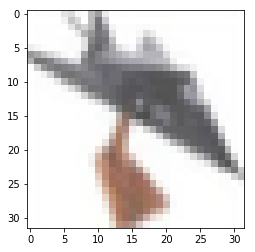

In [55]:
plt.imshow(x_test[215])



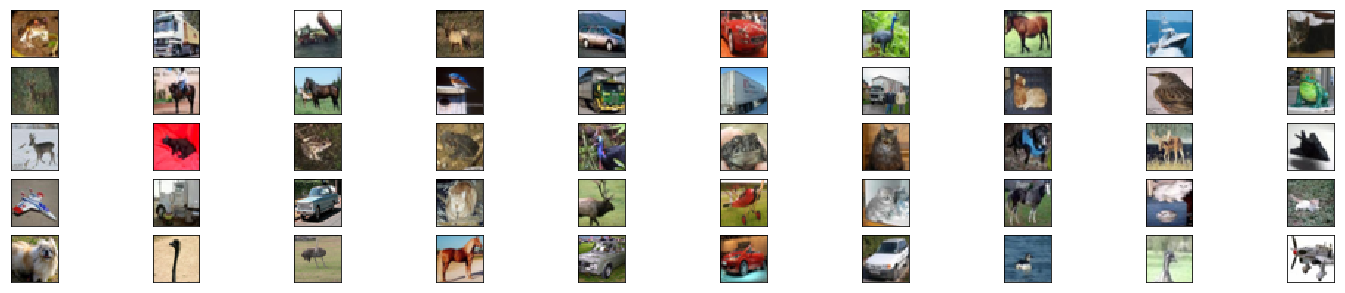

In [58]:
fig = plt.figure(figsize=(25,5))
for i in range(50):
    ax = fig.add_subplot(5,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [ ]:
#Building Cnn

In [59]:
cifar10_model=tf.keras.models.Sequential()


In [60]:
# First Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))

In [61]:
# Second Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))

In [62]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [63]:
# Third Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [64]:
# Fourth Layer
cifar10_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [65]:
# Max Pooling Layer
cifar10_model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [66]:
# Flattening Layer
cifar10_model.add(tf.keras.layers.Flatten())

In [67]:
# Droput Layer
cifar10_model.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [68]:
# Adding the first fully connected layer
cifar10_model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [69]:
# Output Layer
cifar10_model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [70]:
cifar10_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
__________

In [71]:
cifar10_model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])


In [72]:
cifar10_model.fit(x_train,y_train,epochs=15)


Epoch 1/15
50000/50000 [==============================] - 820s 16ms/sample - loss: 1.4632 - sparse_categorical_accuracy: 0.4687
Epoch 2/15
50000/50000 [==============================] - 656s 13ms/sample - loss: 1.0425 - sparse_categorical_accuracy: 0.6287
Epoch 3/15
50000/50000 [==============================] - 586s 12ms/sample - loss: 0.8777 - sparse_categorical_accuracy: 0.6918
Epoch 4/15
50000/50000 [==============================] - 584s 12ms/sample - loss: 0.7855 - sparse_categorical_accuracy: 0.7252
Epoch 5/15
50000/50000 [==============================] - 594s 12ms/sample - loss: 0.7168 - sparse_categorical_accuracy: 0.7492
Epoch 6/15
50000/50000 [==============================] - 666s 13ms/sample - loss: 0.6567 - sparse_categorical_accuracy: 0.7667
Epoch 7/15
50000/50000 [==============================] - 589s 12ms/sample - loss: 0.6179 - sparse_categorical_accuracy: 0.7817
Epoch 8/15
50000/50000 [==============================] - 497s 10ms/sample - loss: 0.5755 - sparse_categ

In [73]:
test_loss, test_accuracy = cifar10_model.evaluate(x_test, y_test)


10000/10000 [==============================] - 49s 5ms/sample - loss: 0.6863 - sparse_categorical_accuracy: 0.7799


In [74]:
print("Test accuracy: {}".format(test_accuracy))


Test accuracy: 0.7799000144004822
